# Chapter 6 - Exercises

# Applied Questions

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 8. In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.


### (a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector  of length n = 100.


In [2]:
np.random.seed(1)

X = np.random.randn(100)
eps = np.random.randn(100)
print('Size of X is ',len(X))

Size of X is  100


### (b) Generate a response vector Y of length n = 100 according to the model


Y = β0 + β1X + β2X2 + β3X3 + eps

In [3]:
# weights are of our choice
beta = [3,4,2,1]
Y = beta[0] + beta[1]*X + beta[2]*X**2 + beta[3]*X**3 + eps

### (c) Use the regsubsets() function to perform best subset selection in order to choose the best model containing the predictors X, X2,...,X10. What is the best model obtained according to Cp, BIC, and adjusted R2? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained.

 



In [4]:
poly = PolynomialFeatures(10,include_bias=False)
predictors = poly.fit_transform(pd.DataFrame({'X':X}))
predictors = pd.DataFrame(predictors)
col = ['X' + str(i) for i in range(1,11)]
predictors.columns = col
predictors.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [6]:
def fit_linear_reg(X,Y):
  #Fit linear regression model and return RSS and R squared values
  X = sm.add_constant(X)
  model = sm.OLS(Y,X).fit()
  return model.ssr,model.rsquared,model


from tqdm import tnrange, tqdm_notebook
from itertools import combinations

def run_subset_selection(X,y):
  #Initialization variables
  RSS_list, R_squared_list, feature_list = [],[],[]
  aic_list,bic_list,adj_r_squared_list = [],[],[]
  numb_features = []

  #Looping over k = 1 to k = 11 features in X
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):
    best_features = None
    best_RSS = None
    best_r2 = 0
    best_model = None

    # Looping over all possible combinations: 
    for combo in combinations(X.columns,k):
      tmp_result = fit_linear_reg(X[list(combo)],Y)   # Store temp result  
      r2 = tmp_result[1]
      if r2 > best_r2:
        best_features = combo
        best_RSS = tmp_result[0]
        best_r2 = tmp_result[1]
        best_model = tmp_result[2]

    RSS_list.append(best_RSS)
    R_squared_list.append(best_r2)
    feature_list.append(best_features)
    numb_features.append(len(best_features))
    aic_list.append(best_model.aic)
    bic_list.append(best_model.bic)
    adj_r_squared_list.append(best_model.rsquared_adj)

  #Store in DataFrame
  df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,
                    'AIC':aic_list,'BIC':bic_list,'adj_r2':adj_r_squared_list,'features':feature_list})
  return df

In [7]:
best_subset_results = run_subset_selection(predictors,Y)

<ipython-input-6-b2f0e2f53d0e>:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


In [8]:
best_subset_results

,numb_features,RSS,R_squared,AIC,BIC,adj_r2,features
0,1,771.612854,0.819633,492.118982,497.329322,0.817793,"(X1,)"
1,2,329.558323,0.922965,409.046022,416.861533,0.921376,"(X1, X2)"
2,3,84.811563,0.980175,275.313877,285.734557,0.979556,"(X1, X2, X3)"
3,4,79.800246,0.981346,271.223347,284.249198,0.980561,"(X1, X2, X3, X6)"
4,5,79.446732,0.981429,272.779363,288.410385,0.980441,"(X1, X2, X3, X8, X10)"
5,6,77.901340,0.981790,272.815004,291.051195,0.980616,"(X1, X2, X5, X7, X8, X9)"
6,7,77.535196,0.981876,274.343886,295.185248,0.980497,"(X1, X2, X3, X5, X7, X9, X10)"
7,8,77.090698,0.981980,275.768950,299.215482,0.980396,"(X1, X2, X3, X4, X5, X6, X7, X9)"
8,9,76.794677,0.982049,277.384221,303.435923,0.980254,"(X1, X2, X4, X5, X6, X7, X8, X9, X10)"
9,10,76.498124,0.982118,278.997310,307.654182,0.980109,"(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)"


In [9]:
print('The best model according to adjR2 is model having features - ',
      best_subset_results.sort_values('adj_r2',ascending=False)['numb_features'].values[0],
     )
print('The best model according to AIC is model having features - ',
      best_subset_results.sort_values('AIC',ascending=True)['numb_features'].values[0])
print('The best model according to BIC is model having features - ',
      best_subset_results.sort_values('BIC',ascending=True)['numb_features'].values[0])

# we can see that using different metrics can give us different outcomes, althuohg what we will observe is that 
# AIC and BIC will give us simialr results

The best model according to adjR2 is model having features -  6
The best model according to AIC is model having features -  4
The best model according to BIC is model having features -  4


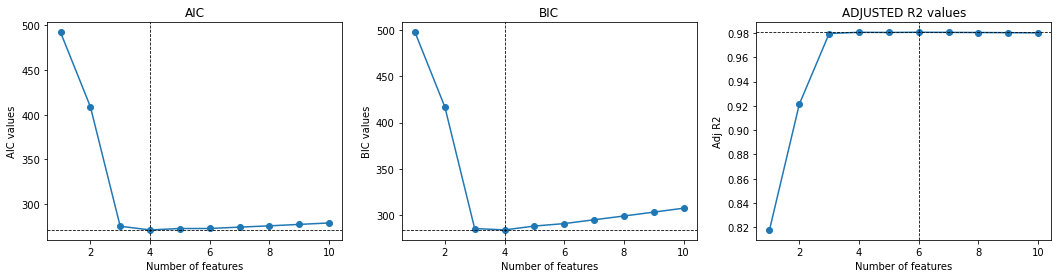

In [10]:
# Since we are going to need to plot these many times, lets make a functions to save us the trouble of writing this again and again
def plot_results(df):
  fig,(a1,a2,a3) = plt.subplots(1,3,figsize = (18,4))
  a1.plot(df['numb_features'],df['AIC'],marker = 'o')
  a1.axhline(y = min(df['AIC']),linestyle = 'dashed',linewidth = 0.8,color = 'black')
  a1.axvline(x =  df.sort_values('AIC',ascending=True)['numb_features'].values[0],color = 'black',
             linestyle = 'dashed',linewidth = 0.8)
  a1.set_title('AIC')
  a1.set_xlabel('Number of features')
  a1.set_ylabel('AIC values')

  a2.plot(df['numb_features'],df['BIC'],marker = 'o')
  a2.axhline(y = min(df['BIC']),linestyle = 'dashed',linewidth = 0.8,color = 'black')
  a2.axvline(x =  df.sort_values('BIC',ascending=True)['numb_features'].values[0],color = 'black',
             linestyle = 'dashed',linewidth = 0.8)
  a2.set_title('BIC')
  a2.set_xlabel('Number of features')
  a2.set_ylabel('BIC values')

  a3.plot(df['numb_features'],df['adj_r2'],marker=  'o')
  a3.axhline(y = max(df['adj_r2']),linestyle = 'dashed',linewidth = 0.8,color = 'black')
  a3.axvline(x =  df.sort_values('adj_r2',ascending=False)['numb_features'].values[0],color = 'black',
             linestyle = 'dashed',linewidth = 0.8)
  a3.set_title('ADJUSTED R2 values')
  a3.set_xlabel('Number of features')
  a3.set_ylabel('Adj R2')

plot_results(best_subset_results)    

In [11]:
print('Features choosen by AIC ',list(best_subset_results['features'][3]))
print('Features choosen by BIC ',list(best_subset_results['features'][3]))
print('Features choosen by adj_r2 ',list(best_subset_results['features'][6]))

Features choosen by AIC  ['X1', 'X2', 'X3', 'X6']
Features choosen by BIC  ['X1', 'X2', 'X3', 'X6']
Features choosen by adj_r2  ['X1', 'X2', 'X3', 'X5', 'X7', 'X9', 'X10']


### (d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?


In [12]:
def forward_stepwise_selection(data,target):
  total_features = [[]]
  list_r2 = []
  list_adj_r2 = []
  list_aic,list_bic = [],[]
  len_features = []
  remaining_features = [col for col in data.columns if not col == target]
  for i in range(1,len(data.columns)):
    best_score = 0;best_feature = None
    best_model = None
    for feature in remaining_features:
      X = total_features[i-1] + [feature]
      model = sm.OLS(data[target],sm.add_constant(data[X])).fit()
      score = model.rsquared
      # print('For len {}, feature - {}, score is {}'.format(i,feature,score))
      if score > best_score:
        best_score = score
        best_feature = feature
        best_model = model

    total_features.append(total_features[i-1] + [best_feature])
    remaining_features.remove(best_feature)
    list_r2.append(best_model.rsquared)
    list_adj_r2.append(best_model.rsquared_adj)
    list_aic.append(best_model.aic)
    list_bic.append(best_model.bic)
    len_features.append(len(total_features[-1]))

  return pd.DataFrame({'numb_features': len_features, 'R_squared':list_r2,
                    'AIC':list_aic,'BIC':list_bic,'adj_r2':list_adj_r2,'features':total_features[1:]})

In [13]:
data = pd.concat([predictors,pd.DataFrame(Y,columns = ['Y'])],axis = 1)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436,18.613080
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342,2.297027
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689,1.701394
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415,0.368960
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617,7.512709


In [14]:
result_fwd = forward_stepwise_selection(data,'Y')

In [15]:
result_fwd

,numb_features,R_squared,AIC,BIC,adj_r2,features
0,1,0.819633,492.118982,497.329322,0.817793,[X1]
1,2,0.922965,409.046022,416.861533,0.921376,"[X1, X2]"
2,3,0.980175,275.313877,285.734557,0.979556,"[X1, X2, X3]"
3,4,0.981346,271.223347,284.249198,0.980561,"[X1, X2, X3, X6]"
4,5,0.981413,272.863273,288.494294,0.980425,"[X1, X2, X3, X6, X10]"
5,6,0.981497,274.414314,292.650506,0.980303,"[X1, X2, X3, X6, X10, X4]"
6,7,0.981718,275.210066,296.051427,0.980327,"[X1, X2, X3, X6, X10, X4, X8]"
7,8,0.981722,277.190336,300.636868,0.980115,"[X1, X2, X3, X6, X10, X4, X8, X9]"
8,9,0.981743,279.076446,305.128148,0.979917,"[X1, X2, X3, X6, X10, X4, X8, X9, X7]"
9,10,0.982118,278.997310,307.654182,0.980109,"[X1, X2, X3, X6, X10, X4, X8, X9, X7, X5]"


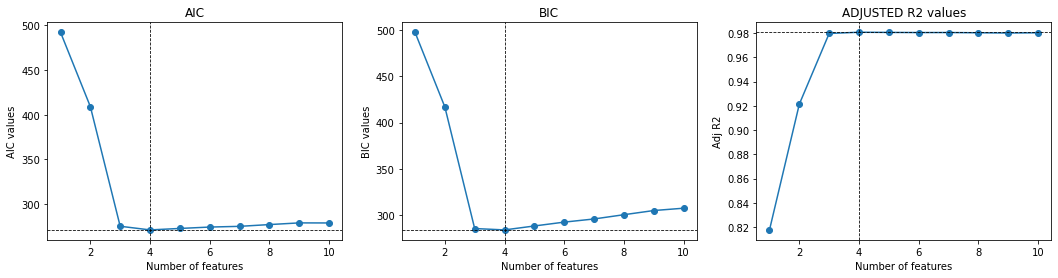

In [16]:
plot_results(result_fwd)

#### in this case, best model is model with 4 features, for all the three metrics

In [18]:
def backward_stepwise_selection(data, target):
  features =  [col for col in data.columns if not col == target]
  total_features = []
  list_r2 = []
  list_adj_r2 = []
  list_aic,list_bic = [],[]
  len_features = []
  while(len(features)>0):
    features_with_constant = sm.add_constant(data[features])
    model = sm.OLS(data[target], features_with_constant).fit()
    max_p_value = model.pvalues[1:].max()
    total_features.append(features.copy())
    list_r2.append(model.rsquared)
    list_aic.append(model.aic)
    list_bic.append(model.bic)
    len_features.append(len(total_features[-1]))
    list_adj_r2.append(model.rsquared_adj)
    excluded_feature = model.pvalues[1:].idxmax()
    features.remove(excluded_feature)
  return pd.DataFrame({'numb_features': len_features, 'R_squared':list_r2,
                    'AIC':list_aic,'BIC':list_bic,'adj_r2':list_adj_r2,'features':total_features})

In [19]:
result_bwd = backward_stepwise_selection(data,'Y')

In [20]:
result_bwd

,numb_features,R_squared,AIC,BIC,adj_r2,features
0,10,0.982118,278.997310,307.654182,0.980109,"[X1, X2, X3, X4, X5, X6, X7, X8, X9, X10]"
1,9,0.982049,277.384221,303.435923,0.980254,"[X1, X2, X4, X5, X6, X7, X8, X9, X10]"
2,8,0.981940,275.989785,299.436317,0.980352,"[X1, X2, X4, X5, X6, X7, X8, X9]"
3,7,0.981844,274.521879,295.363241,0.980462,"[X1, X2, X4, X5, X6, X7, X9]"
4,6,0.981764,272.962058,291.198249,0.980587,"[X1, X2, X5, X6, X7, X9]"
5,5,0.980788,276.172489,291.803510,0.979766,"[X1, X2, X5, X6, X7]"
6,4,0.980037,278.006463,291.032314,0.979197,"[X1, X2, X5, X7]"
7,3,0.977367,288.559405,298.980086,0.976660,"[X1, X2, X5]"
8,2,0.922965,409.046022,416.861533,0.921376,"[X1, X2]"
9,1,0.819633,492.118982,497.329322,0.817793,[X1]


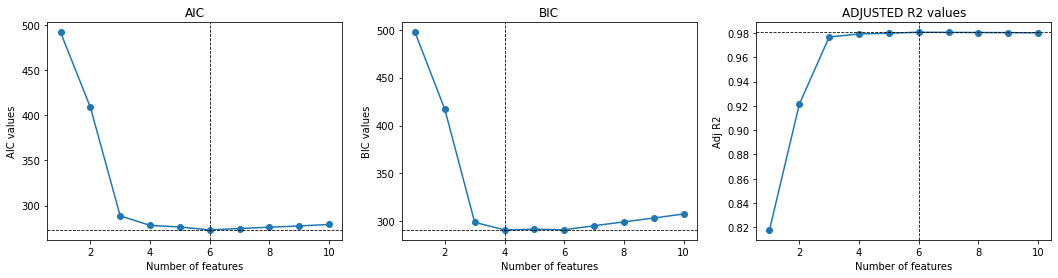

In [21]:
plot_results(result_bwd)

### (e) Now fit a lasso model to the simulated data, again using X, X2, ...,X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.





In [22]:
# predictors contain the dataframe for all the X's, response is stored in Y dataframe
predictors.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [23]:
alpha_list = 10**np.linspace(-5,3,100)

In [24]:
def run_lasso(X,y,alpha_list):
  """
  Input - 
     X - predictors
     y - response
     alpha_list - list of parameter for lasso - alpha
  Returns - 
     coeff dict - dict of alpha - coeffs 
     cv_error_list - list of cross val errors
  """
  coeff_dict = {}
  cv_error_list = []
  for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X,y)
    coeff_dict[alpha] = list(lasso.coef_)
    cv_error_list.append(-np.mean(cross_val_score(lasso,X,y,cv = 10,scoring = 'neg_mean_squared_error')))
  return coeff_dict,cv_error_list     

In [26]:
from warnings import filterwarnings
filterwarnings('ignore')

coeff_dict,cv_error_list = run_lasso(predictors,Y,alpha_list)

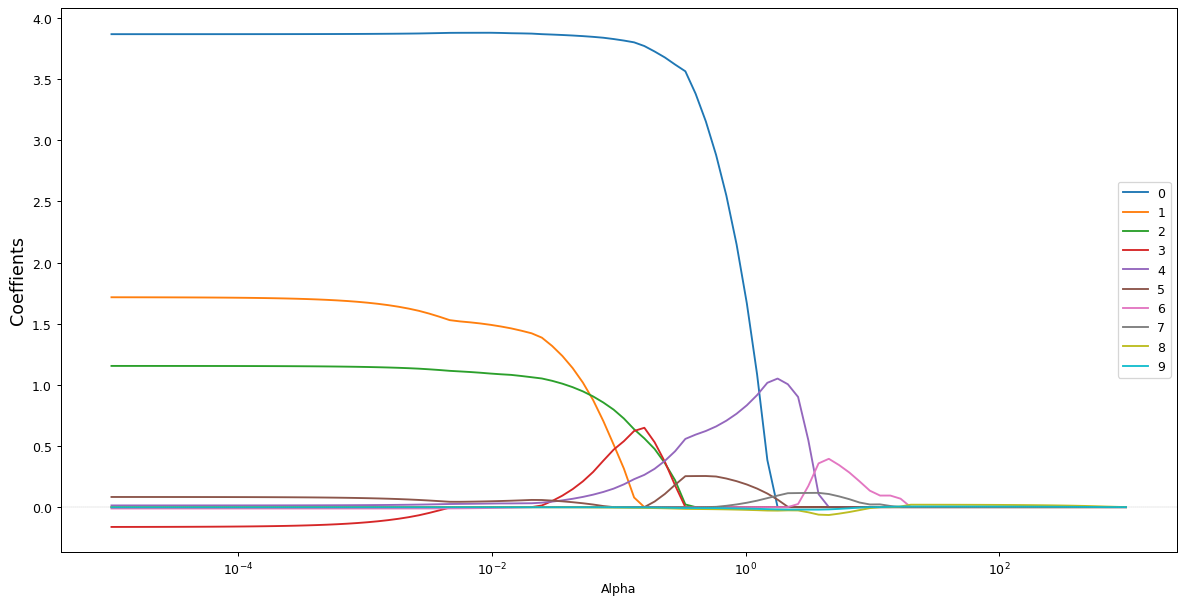

In [28]:
# Analyzing the coefficients
tmp = pd.DataFrame(coeff_dict).T
tmp.index = alpha_list
tmp.head()

plt.figure(figsize = (16,8), dpi=90)
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xticks(alpha_list)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')
plt.xscale('log')

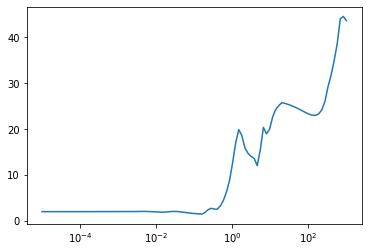

In [29]:
# Cross validation error
plt.plot(alpha_list,cv_error_list)
plt.xscale('log')

#### FOr cv, we can use a built finction LassoCV

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [30]:
# Using lassoCV
# we just need to pass number of alphas, it automatically chooses the list of alphas to be considerd for normalization
# Since, we have only 100 observations, we are going to set a high number of iterations

lasso_cv = LassoCV(alphas = alpha_list,normalize = True,max_iter = 100000)
lasso_cv.fit(predictors,Y)

alphas_used = lasso_cv.alphas_
mse_cv = np.mean(lasso_cv.mse_path_,axis = 1)

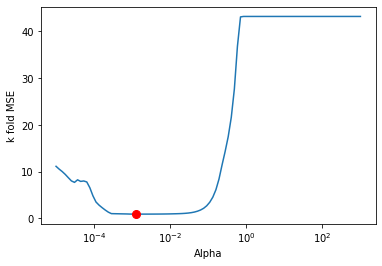

In [31]:
plt.plot(alphas_used,mse_cv)
plt.plot(lasso_cv.alpha_,min(mse_cv),marker = 'o',color = 'red',markersize = 8)
plt.xlabel('Alpha')
plt.ylabel('k fold MSE')
plt.xscale('log')

In [32]:
# Model Selected 

print(pd.Series(np.hstack([lasso_cv.intercept_,lasso_cv.coef_]),index = ['Intercept']+['X' + str(i) for i in range(1,11)]))

Intercept    3.306204
X1           3.907543
X2           1.527781
X3           1.097265
X4           0.087495
X5           0.000000
X6           0.007354
X7           0.000000
X8           0.000000
X9           0.000000
X10          0.000000
dtype: float64


In [33]:
# this is our stimualted data - beta = [3,4,2,1]
# our model predicted - [3.3,3.9,1.5,1.09]
# this is very clase to the real coefficients

### (f) Now generate a response vector Y according to the model, and perform best subset selection and the lasso. Discuss the results obtained.

Y = β0 + β7X7 + eps

In [34]:
X.shape

(100,)

In [35]:
beta = [0.5,2]
Y =  beta[0] + beta[1]*X**7 + np.random.randn(100)

In [36]:
predictors.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [37]:
result_subset = run_subset_selection(predictors,Y)

In [38]:
result_subset.head()

,numb_features,RSS,R_squared,AIC,BIC,adj_r2,features
0,1,101.459924,0.999901,289.237077,294.447417,0.999900,"(X7,)"
1,2,99.287288,0.999904,289.072443,296.887954,0.999902,"(X7, X9)"
2,3,98.640400,0.999904,290.418780,300.839460,0.999901,"(X1, X7, X9)"
3,4,97.091836,0.999906,290.836417,303.862268,0.999902,"(X1, X7, X8, X10)"
4,5,97.035259,0.999906,292.778129,308.409150,0.999901,"(X1, X6, X7, X8, X10)"


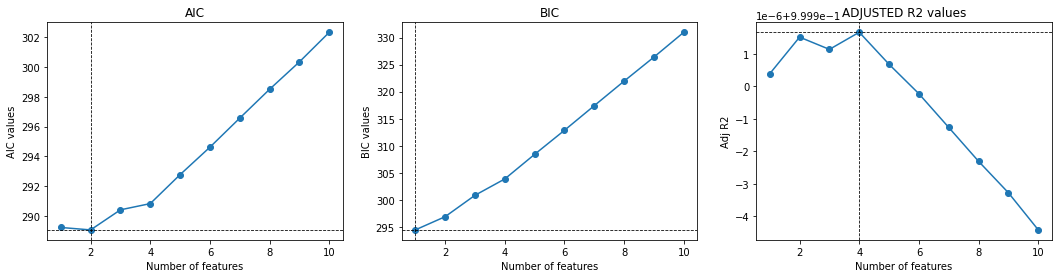

In [39]:
plot_results(result_subset)

In [40]:
# we can see that the first feature choosen is X7. Lets see what are the coeff for it
model = LinearRegression()
model.fit(predictors['X7'].to_frame(),Y)
print(model.intercept_,model.coef_)
# we can see how close the predicted weights are that to the real ones

0.5674985885775612 [2.00015928]


In [41]:
# Lasso 
lasso_cv = LassoCV(alphas = alpha_list,normalize = True,max_iter = 100000)
lasso_cv.fit(predictors,Y)

alphas_used = lasso_cv.alphas_
mse_cv = np.mean(lasso_cv.mse_path_,axis = 1)

In [42]:
print(pd.Series(np.hstack([lasso_cv.intercept_,lasso_cv.coef_]),index = ['Intercept']+['X' + str(i) for i in range(1,11)]))

Intercept    0.527720
X1          -0.000000
X2          -0.000000
X3           0.000000
X4          -0.000000
X5           0.461373
X6           0.000000
X7           1.792293
X8           0.000000
X9           0.022493
X10          0.000000
dtype: float64


In [43]:
# The weights of intercept and X7 here too is close to the original

## 9. In this exercise, we will predict the number of applications received using the other variables in the College data set.
 

In [45]:
college = pd.read_csv(r'./data/College.csv')
print(college.shape)
college.head()

(777, 19)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [46]:
college.drop('Unnamed: 0',axis = 1,inplace = True)

### (a) Split the data set into a training set and a test set

In [47]:
# before splitting , lets convert the cat features into numerical by one hot encoding
college['Private'] = college['Private'].map({'Yes':1,'No':0})

In [48]:
# now lets split into train and test
X_train,X_test,y_train,y_test = train_test_split(college.drop('Apps',axis = 1),college['Apps'],test_size = 0.3,random_state = 0)
print(X_train.shape,X_test.shape)

(543, 17) (234, 17)


### (b) Fit a linear model using least squares on the training set, and report the test error obtained.


In [49]:
# we wil look at this at last
results_dict = {}

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)
print('Score is ',r2_score(y_test,pred))
results_dict['Least_squares'] = r2_score(y_test,pred)

Score is  0.9086043157818345


### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.


In [51]:
alphas = 10**(np.linspace(-4,0,100))
ridge_cv = RidgeCV(alphas = alphas,normalize=True,store_cv_values=True)
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        normalize=True, store_cv_values=True)

In [52]:
print('valur of alpha choosen is ',ridge_cv.alpha_)

valur of alpha choosen is  0.0041320124001153384


Text(0.5, 1.0, 'Ridge Regression')

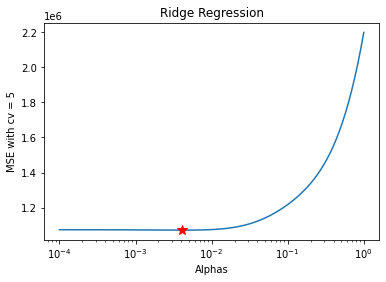

In [53]:
mse_values = ridge_cv.cv_values_
#mse_values.shape
mse_errors = np.mean(mse_values,axis = 0)
plt.plot(ridge_cv.alphas,mse_errors)
plt.plot(ridge_cv.alpha_,np.min(mse_errors),marker = '*',markersize = 10,color = 'red')
plt.xscale('log')
plt.xlabel('Alphas')
plt.ylabel('MSE with cv = 5')
plt.title('Ridge Regression')

In [54]:
pred = ridge_cv.predict(X_test)
print('R2 Score is ',r2_score(y_test,pred))
results_dict['Ridge'] = r2_score(y_test,pred)

R2 Score is  0.9028402319645064


In [55]:
print(pd.Series(np.hstack([ridge_cv.intercept_,ridge_cv.coef_]),index = ['Intercept'] + list(college.drop('Apps',axis = 1).columns)))

Intercept     -418.377749
Private       -686.576113
Accept           1.203935
Enroll          -0.210836
Top10perc       49.876799
Top25perc      -14.321659
F.Undergrad      0.092081
P.Undergrad      0.035984
Outstate        -0.036489
Room.Board       0.225146
Books            0.036336
Personal        -0.048860
PhD             -8.943022
Terminal        -5.093359
S.F.Ratio        4.544561
perc.alumni     -8.628554
Expend           0.065120
Grad.Rate       10.695085
dtype: float64


### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [56]:
lasso_cv = LassoCV(alphas = alphas,normalize = True,cv = 10)
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=10, normalize=True)

In [57]:
lasso_cv.alpha_

0.4750810162102798

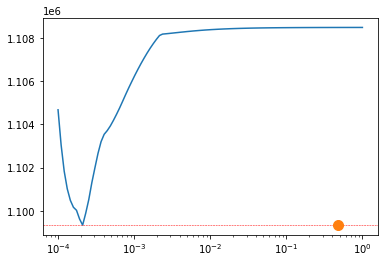

In [58]:
mse_lasso = np.mean(lasso_cv.mse_path_,axis = 1)
plt.plot(lasso_cv.alphas,mse_lasso)
plt.axhline(y = min(mse_lasso),linewidth = 0.5,linestyle = 'dashed',color = 'r')
plt.plot(lasso_cv.alpha_,np.min(mse_lasso),marker = 'o',markersize = 10)
plt.xscale('log')

#### After lots of hair pulling i am still not ablet to get why this dot is not on the line, please if you can find it, 
#### do leave an issue

In [61]:
pred = lasso_cv.predict(X_test)
print('R2 score is ',r2_score(y_test,pred))
results_dict['Lasso'] = r2_score(y_test,pred)

R2 score is  0.9034594192776941


In [62]:
print(pd.Series(np.hstack([lasso_cv.intercept_,lasso_cv.coef_]),index = ['Intercept'] + list(college.drop('Apps',axis = 1).columns)))

Intercept     -465.630008
Private       -670.751294
Accept           1.199801
Enroll          -0.000000
Top10perc       44.166457
Top25perc       -9.580167
F.Undergrad      0.054075
P.Undergrad      0.030898
Outstate        -0.025573
Room.Board       0.205365
Books            0.000000
Personal        -0.018548
PhD             -7.816703
Terminal        -4.509051
S.F.Ratio        0.000000
perc.alumni     -7.671402
Expend           0.058111
Grad.Rate        8.396615
dtype: float64


#### Three coefficients are shrunk to zero.

### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.



In [65]:
num_components = np.arange(1,X_train.shape[1])
cv_score_pcr = []

for num_component in num_components:
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_train)

  pca = PCA(n_components=num_component)
  X_pc = pca.fit_transform(X_scaled)

  lin_model = LinearRegression()

  cv_score_pcr.append(np.mean(cross_val_score(lin_model,X_pc,y_train,cv = 10)))

Text(0.5, 1.0, 'PCR')

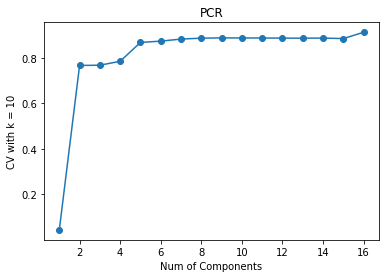

In [66]:
plt.plot(num_components,cv_score_pcr,marker = 'o')
plt.xlabel('Num of Components')
plt.ylabel('CV with k = 10')
plt.title('PCR')

#### The max score is for num_comp = 17, through which we will have the same model as with simple least squares
#### but, lets see what score will we get when we choose num_components = 5

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
    
pca = PCA(n_components=5)
X_pc = pca.fit_transform(X_scaled)
    
lin_model = LinearRegression()
lin_model.fit(X_pc,y_train)

# To find the predictions for X_test, we need to scale it 
X_test_scaled = scaler.transform(X_test)
X_test_pc = pca.transform(X_test_scaled)

pred = lin_model.predict(X_test_pc)
print('Score for pcr with num_components = 5 is ',r2_score(y_test,pred))
# that's not good at all, we will stich with num_components = 17, which will give sane model as least squares

Score for pcr with num_components = 5 is  0.7659199507222769


In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
    
pca = PCA(n_components=17)
X_pc = pca.fit_transform(X_scaled)
    
lin_model = LinearRegression()
lin_model.fit(X_pc,y_train)

# To find the predictions for X_test, we need to scale it 
X_test_scaled = scaler.transform(X_test)
X_test_pc = pca.transform(X_test_scaled)

pred = lin_model.predict(X_test_pc)
print('Score for pcr with num_components = 17 is ',r2_score(y_test,pred))
# that's not good at all, we will stich with num_components = 17, which will give sane model as least squares
results_dict['PCR'] = r2_score(y_test,pred)

Score for pcr with num_components = 17 is  0.9086043157818379


### (f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.


In [69]:
num_components

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [70]:
cv_scores_pls = []
for num_component in num_components:
  pls = PLSRegression(n_components=num_component,scale = True)
  cv_scores_pls.append(np.mean(cross_val_score(pls,X_train,y_train)))

Text(0.5, 1.0, 'PLS')

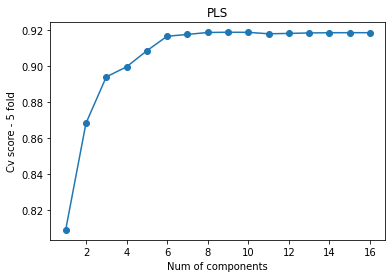

In [71]:
plt.plot(num_components,cv_scores_pls,marker = 'o')
plt.xlabel('Num of components')
plt.ylabel('Cv score - 5 fold')
plt.title('PLS')

In [72]:
max(zip(cv_scores_pls,num_components))

(0.9188797303508398, 9)

In [73]:
# By corss validation we have num components as 9

In [74]:
# lets see how this model performs
pls = PLSRegression(n_components=9,scale = True)
pls.fit(X_train,y_train)
pred = pls.predict(X_test)
print('Score for PLS is ',r2_score(y_test,pred))
results_dict['PLS'] = r2_score(y_test,pred)

Score for PLS is  0.9083013629152908


### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?
 

In [75]:
print(pd.Series(results_dict))

Least_squares    0.908604
Ridge            0.902840
Lasso            0.903459
PCR              0.908604
PLS              0.908301
dtype: float64


In [76]:
# We can see from above that all the methods have almost similar results

## 10. We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set



### (a) Generate a data set with p = 20 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model. where β has some elements that are exactly equal to zero.


Y = Xβ + eps

In [77]:
X = np.random.normal(size = (1000,20))
print('Shape of X is ',X.shape)

Shape of X is  (1000, 20)


In [78]:
np.random.seed(3)

# we are going to select beta in such a way that half of the value contain 0
beta = np.random.randint(-10,10,10)
beta = np.concatenate([beta,np.zeros(10)])
np.random.shuffle(beta)
beta

array([  9.,   0.,   0.,   0.,   0.,   0.,  -4., -10.,   0.,   0.,  -2.,
         1.,   0.,  -7.,   0.,   0.,   0.,  -1.,   0.,   0.])

In [79]:
beta = np.expand_dims(beta,axis = 1)
beta.shape

(20, 1)

In [80]:
np.random.seed(1)
# Y = X*Beta + eps
# shapees - (1000,1) = (1000,20)*(20,1) + (1000,1)
Y = np.dot(X,beta) + np.random.normal(size = (1000,1))

In [81]:
# Converting it into a dataframe
data = pd.DataFrame(X,columns=['X_' + str(i) for i in range(1,21)])
print(data.shape)
data.head()

(1000, 20)


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20
0,0.241323,1.955134,0.426956,0.261552,0.617686,-0.799991,-1.144385,0.973780,-0.448918,0.476674,-0.755448,0.713506,-0.288638,-0.769540,-0.020298,1.051197,0.286832,-0.623056,0.828185,0.086526
1,-0.987976,-0.898286,0.782034,0.397926,-1.835601,-1.510353,-0.033285,-0.753336,0.945832,-2.256253,-0.659567,0.438306,-0.913731,-1.323511,-0.446425,-0.798085,-1.919052,0.532547,0.677955,-0.249261
2,0.302180,0.998392,-0.114597,0.780467,-1.088104,2.543010,-0.680824,-1.301080,-0.734238,-0.709654,1.402016,-0.233470,-0.022781,0.407471,1.681403,-0.206323,0.657948,-1.359967,0.572952,-0.014225
3,-0.051045,0.259845,0.029629,-0.097268,-0.787144,-0.526088,-1.171730,-1.630688,-0.487596,0.274052,-0.396987,0.296913,1.614031,-1.539734,-0.143267,-0.818176,-1.265632,1.745341,1.485732,0.087746
4,-0.347875,-0.838813,2.462865,1.713489,-0.971495,-0.839616,-0.451388,1.288959,0.854213,-1.281334,1.582656,0.758452,-0.177142,-0.689560,1.695916,-0.947132,0.350777,0.935838,-0.960158,-0.182359


### (b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.
 

In [82]:
X_train,X_test,y_train,y_test = train_test_split(data,Y,test_size = 0.9,random_state = 1)
print('Shape of X_train and X_test are respecitively ',X_train.shape,X_test.shape)

Shape of X_train and X_test are respecitively  (100, 20) (900, 20)


### (c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.


In [83]:
def fit_linear_reg(X,Y):
  #Fit linear regression model and return RSS and R squared values
  X = sm.add_constant(X)
  model = sm.OLS(Y,X).fit()
  return model.ssr,model.rsquared,model


from tqdm import tnrange, tqdm_notebook
from itertools import combinations

def run_subset_selection_with_return_models(X,y):
  #Initialization variables
  RSS_list, R_squared_list, feature_list = [],[],[]
  aic_list,bic_list,adj_r_squared_list = [],[],[]
  numb_features = []
  list_models = []
  list_train_mse = []

  #Looping over k = 1 to k = 11 features in X
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):
    best_features = None
    best_RSS = None
    best_r2 = 0
    best_model = None

    #Looping over all possible combinations: 
    for combo in combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result  
        r2 = tmp_result[1]
        if r2 > best_r2:
            best_features = combo
            best_RSS = tmp_result[0]
            best_r2 = tmp_result[1]
            best_model = tmp_result[2]

    RSS_list.append(best_RSS)
    R_squared_list.append(best_r2)
    feature_list.append(best_features)
    numb_features.append(len(best_features))
    aic_list.append(best_model.aic)
    bic_list.append(best_model.bic)
    adj_r_squared_list.append(best_model.rsquared_adj)
    list_models.append(best_model)

  #Store in DataFrame
  df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,
                    'AIC':aic_list,'BIC':bic_list,'adj_r2':adj_r_squared_list,'features':feature_list})
  return df,list_models

In [84]:
results_best_subset,best_subset_models = run_subset_selection_with_return_models(X_train.iloc[:,:12],y_train)
results_best_subset

,numb_features,RSS,R_squared,AIC,BIC,adj_r2,features
0,1,17679.770786,0.419284,805.288325,810.498666,0.413358,"(X_8,)"
1,2,8254.627404,0.728866,731.123610,738.939121,0.723275,"(X_1, X_8)"
2,3,5683.248442,0.813326,695.798514,706.219194,0.807492,"(X_1, X_7, X_8)"
3,4,5043.534123,0.834338,685.856921,698.882772,0.827363,"(X_1, X_7, X_8, X_11)"
4,5,4783.818852,0.842869,682.570131,698.201152,0.834511,"(X_1, X_5, X_7, X_8, X_11)"
5,6,4755.815015,0.843789,683.983024,702.219216,0.833711,"(X_1, X_4, X_5, X_7, X_8, X_11)"
6,7,4729.376679,0.844657,685.425557,706.266919,0.832838,"(X_1, X_4, X_5, X_6, X_7, X_8, X_11)"
7,8,4716.608316,0.845077,687.155212,710.601744,0.831457,"(X_1, X_4, X_5, X_6, X_7, X_8, X_11, X_12)"
8,9,4706.598057,0.845405,688.942753,714.994454,0.829946,"(X_1, X_4, X_5, X_6, X_7, X_8, X_10, X_11, X_12)"
9,10,4704.169897,0.845485,690.891149,719.548021,0.828124,"(X_1, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11..."


#### IT was taking too much time on my computer to run best subset selection for p = 20, hence i reduced it to 12 features

In [86]:
from warnings import filterwarnings
filterwarnings('ignore')
# Adding test_mse 
test_mse = []
for model,features in zip(best_subset_models,results_best_subset['features']):
    pred = model.predict(sm.add_constant(X_test.iloc[:,:12][list(features)]))
    test_mse.append(mean_squared_error(pred,y_test))

### d) Plot the test set MSE associated with the best model of each size.

Text(0, 0.5, 'Test MSE')

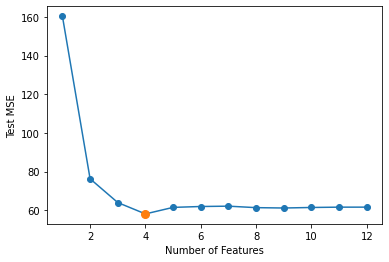

In [87]:
plt.plot(results_best_subset['numb_features'],test_mse,marker = 'o')
plt.plot((min(zip(test_mse,results_best_subset['numb_features'])))[1],np.min(test_mse),marker = 'o',markersize = 8)
plt.xlabel('Number of Features')
plt.ylabel('Test MSE')
# Min mse is at num_features = 4

Text(0.5, 1.0, 'Train vs Test MSE')

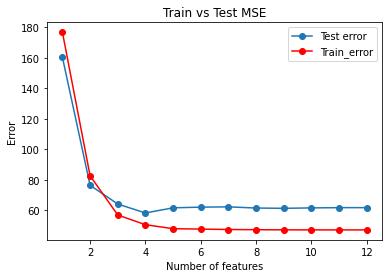

In [88]:
# Comparing the plot of test mse and train mse
plt.plot(results_best_subset['numb_features'],test_mse,marker = 'o')
plt.plot(results_best_subset['numb_features'],results_best_subset['RSS'] / len(X_train),marker = 'o',color = 'red')

# we can see that train mse goes on decreasing with increase in number of features, however that is not the case with test mse
plt.legend(['Test error','Train_error'])
plt.xlabel('Number of features')
plt.ylabel('Error')
plt.title('Train vs Test MSE')

### (e) For which model size does the test set MSE take on its minimum value? Comment on your results. 
 

In [89]:
# Test error is minimum for a model with four features
print('The features of the moodel which has the lowest test mse are ',results_best_subset['features'].loc[3])

The features of the moodel which has the lowest test mse are  ('X_1', 'X_7', 'X_8', 'X_11')


### (f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values



In [90]:
select_model = best_subset_models[3]

In [91]:
# if we compare it to the original model
list(beta[[0,6,7,10]])

[array([9.]), array([-4.]), array([-10.]), array([-2.])]

In [92]:
pd.DataFrame({'Predicted':select_model.params.values[1:],'True':list(beta[[0,6,7,10]])})

,Predicted,True
0,8.949168,[9.0]
1,-4.658341,[-4.0]
2,-10.138200,[-10.0]
3,-2.622982,[-2.0]


#### We can see that the values  selected are very close to the true values

### g) Create a plot displaying 'for a range of values of r, where βˆr j is the jth coefficient estimate for the best model containing r coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

eq given in the question

In [95]:
best_estimates = select_model.params.values[1:]
l2_norms = []
for model in best_subset_models:
  params = model.params.values[1:]
  l2_norms.append(np.linalg.norm(params))

Text(0, 0.5, 'L2 Norm')

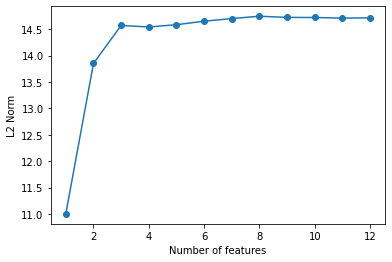

In [96]:
plt.plot(results_best_subset['numb_features'],l2_norms,marker = 'o')
plt.xlabel('Number of features')
plt.ylabel('L2 Norm')

## 11. We will now try to predict per capita crime rate in the Boston data set.

In [97]:
from sklearn.datasets import load_boston
boston = load_boston()

In [98]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
predictors = data.drop('CRIM',axis = 1)
y = data['CRIM']
predictors.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


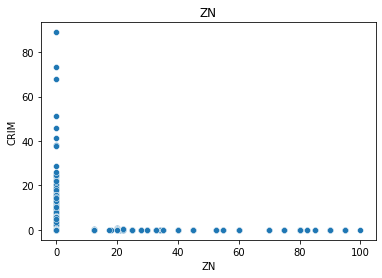

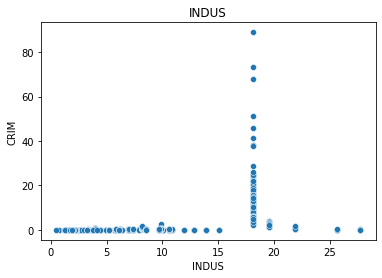

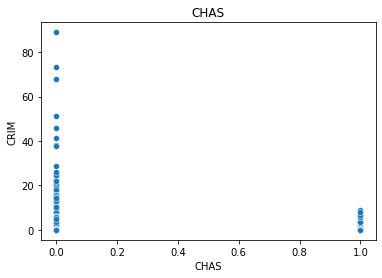

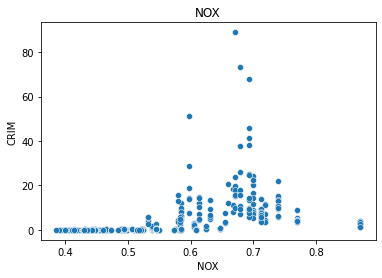

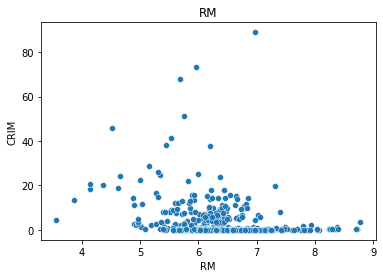

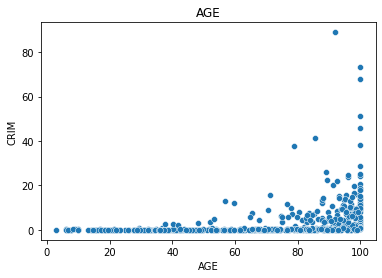

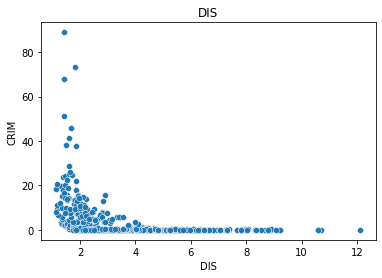

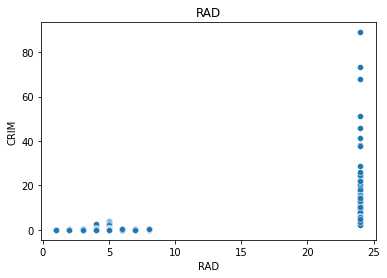

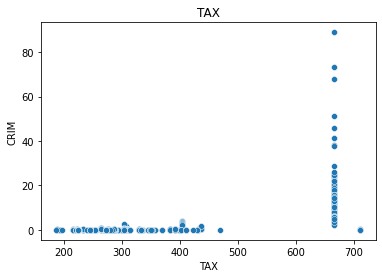

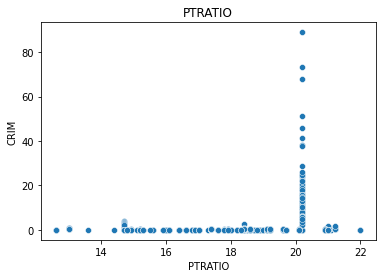

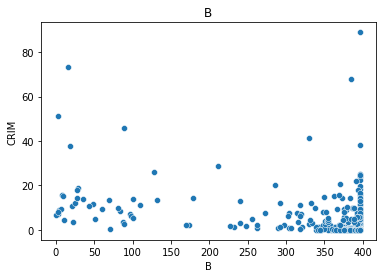

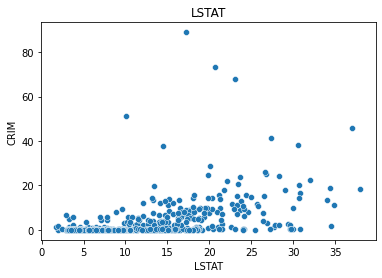

In [101]:
for feature in predictors.columns:
  sns.scatterplot(predictors[feature],data['CRIM'])
  plt.title(feature)
  plt.show()

### (a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.




In [102]:
results_dict = {}

### Best subset selection

In [103]:
# Insteading of running the algorithm, lets try it with hand selected features
hand_selected_features = ['NOX','DIS','RAD','LSTAT']

In [104]:
lin_reg = LinearRegression()
error = cross_val_score(lin_reg,predictors[hand_selected_features],y,cv = 5,scoring = 'neg_mean_squared_error')
print('Error for best subset selection is ',-np.mean(error))
results_dict['Best_subset'] = -np.mean(error)

Error for best subset selection is  44.468614289929995


###  Least Squares

In [105]:
lin_reg = LinearRegression()
error = cross_val_score(lin_reg,predictors,y,cv = 5,scoring = 'neg_mean_squared_error')
print('Error for best subset selection is ',-np.mean(error))
results_dict['least_squares'] = -np.mean(error)

Error for best subset selection is  48.57680751139635


### RIdge Regression

In [106]:
ridgecv = RidgeCV(alphas = 10**np.linspace(-4,0,100),normalize = True,store_cv_values=True)
ridgecv.fit(predictors,y)
#lets look at the shape of cv values
ridgecv.cv_values_.shape

(506, 100)

In [107]:
print("The best score for ridge regression is ",ridgecv.score(predictors,y))
results_dict['Ridge'] = ridgecv.score(predictors,y)

The best score for ridge regression is  0.4415281762142198


Text(0, 0.5, 'CV ERROR MSE')

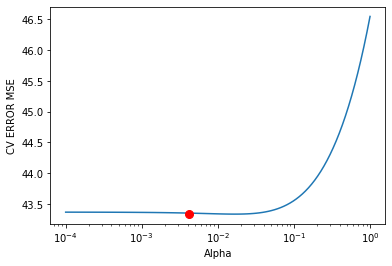

In [108]:
# Cv value are having a shape of (506,100), which means that for each alpha we have to take mean at axis = 0, t0
# get mean cv values. 506 suggets that it is LOOCV
mse_cv = np.mean(ridgecv.cv_values_,axis = 0)
plt.plot(ridge_cv.alphas,mse_cv)
plt.plot(ridge_cv.alpha_,np.min(mse_cv),marker = 'o',color = 'red',markersize = 8)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV ERROR MSE')


In [109]:
# We will use hstack, for horizontal stacing of numpy arrays, for vertical we would use vstack
pd.Series(np.hstack([ridgecv.intercept_,ridgecv.coef_]),index = ['Intercept'] + list(predictors.columns))

Intercept    8.217616
ZN           0.033446
INDUS       -0.078059
CHAS        -1.244094
NOX         -5.822660
RM          -0.289045
AGE          0.001512
DIS         -0.656616
RAD          0.486683
TAX          0.001082
PTRATIO     -0.060691
B           -0.009707
LSTAT        0.229104
dtype: float64

### Lasso

In [110]:
lassocv = LassoCV(alphas = 10**np.linspace(-4,0,100),normalize = True,cv = 5)
lassocv.fit(predictors,y)

lassocv.mse_path_.shape

(100, 5)

In [111]:
print("The best score for lasso is ",lassocv.score(predictors,y))
results_dict['Lasso'] = lassocv.score(predictors,y)

The best score for lasso is  0.425720149350171


Text(0, 0.5, 'CV ERROR MSE')

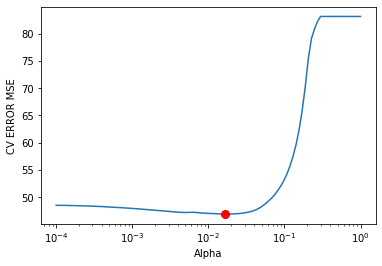

In [112]:
# in this case we will take the mean at axis = 1
mse_cv = np.mean(lassocv.mse_path_,axis = 1)
plt.plot(lassocv.alphas_,mse_cv)
plt.plot(lassocv.alpha_,np.min(mse_cv),marker = 'o',color = 'red',markersize = 8)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV ERROR MSE')


In [113]:
pd.Series(np.hstack([lassocv.intercept_,lassocv.coef_]),index = ['Intercept'] + list(predictors.columns))

Intercept   -0.545888
ZN           0.000000
INDUS        0.000000
CHAS        -0.000000
NOX          0.000000
RM          -0.000000
AGE          0.000000
DIS         -0.023275
RAD          0.466255
TAX          0.000000
PTRATIO     -0.000000
B           -0.007033
LSTAT        0.182062
dtype: float64

In [114]:
# 8 coefficients have been reduced to 0 weights, GREAT!

### (b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.




In [115]:
pd.DataFrame(results_dict,index = ['Error']).T.sort_values(by = 'Error')

,Error
Lasso,0.425720
Ridge,0.441528
Best_subset,44.468614
least_squares,48.576808


#### We can see in the above dataframe, that ridge regression has the lease cv error followed by Ridge, best_subset, and least_squares

### (c) Does your chosen model involve all of the features in the data set? Why or why not?


#### No the choosen model, does not contain all the features. In fact, 8 of the features, have 0 coefficients.

## Hope you enjoyed the notebook :)
## Keep learning